### download training data

In [1]:
from pathlib import Path
root=Path('data')
root.mkdir(exist_ok=True)
path= root / "human_prompt.csv"

import os
os.environ["HF_HOME"] = str(Path("data").absolute())


import pandas as pd

df = pd.read_parquet("hf://datasets/Dahoas/instruct-human-assistant-prompt/data/train-00000-of-00001-bdbcc68add6f4a9a.parquet")

df.to_csv("human_prompt.csv")

### imports

In [2]:
import pandas as pd 
import numpy as np
import warnings
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## prepocessing

In [3]:
data=pd.read_csv(path)

In [4]:
data

,prompt
0,Human: I was wondering if you could walk me th...
1,Human: What type of wine goes best with steak....
2,Human: How do I know if this is a good investm...
3,Human: Please provide me with some financial a...
4,Human: What kind of safety devices do I need t...
...,...
104865,Human: What are the most invasive species most...
104866,Human: How do I market my business product or ...
104867,Human: any advice on foreign university langua...
104868,Human: What are some common kitchen herbs that...


In [5]:
df=data.head(7000)

In [6]:
df

,prompt
0,Human: I was wondering if you could walk me th...
1,Human: What type of wine goes best with steak....
2,Human: How do I know if this is a good investm...
3,Human: Please provide me with some financial a...
4,Human: What kind of safety devices do I need t...
...,...
6995,Human: How do I troubleshoot a slow home Wi-Fi...
6996,Human: What are some tips for optimizing a Win...
6997,Human: What are the pros and cons of rent vs. ...
6998,Human: What are some tips for surviving a stre...


In [7]:
import re

def instruction_to_decoder_chat(text):
    out = ["<bos>"]

    # split on Human / Assistant labels
    pattern = r"(Human:|Assistant:)"
    parts = re.split(pattern, text)

    i = 1
    while i < len(parts) - 1:
        role = parts[i].strip()
        content = parts[i + 1].strip()

        # stop if we hit meta-instructions
        if content.lower().startswith("above is a dialogue"):
            break

        if role == "Human:":
            out.append("<user>")
            out.append(content)
            out.append("</user>")
        elif role == "Assistant:":
            out.append("<assistant>")
            out.append(content)
            out.append("</assistant>")

        i += 2

    out.append("<eos>")
    return " ".join(out)


In [8]:
instruction_to_decoder_chat(df.prompt[0])

"<bos> <user> I was wondering if you could walk me through the process of setting up a hydroponic garden for herbs. </user> <assistant> Sure! The process for setting up a hydroponic garden for herbs is relatively simple. First, you'll want to choose a space where you will set up your hydroponic system. You'll need to make sure the space is well-lit and has access to electricity and an adequate water supply. Next, you'll need to choose the type of hydroponic system you want to use. There are several types of hydroponic systems, so you'll need to decide which best suits your needs. Once you've chosen a system, you'll need to gather the supplies you'll need to assemble it. This includes things like pumps, growing trays, grow lights, and nutrients. Once you've assembled the system, you'll need to add your choice of herbs to the system. Lastly, you'll need to monitor and adjust the system as needed to ensure your herbs are getting the correct amount of light, water, and nutrients. \n\n Abov

In [9]:
df['prompt']=df['prompt'].apply(instruction_to_decoder_chat)
warnings.filterwarnings("ignore")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5164\2597345551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prompt']=df['prompt'].apply(instruction_to_decoder_chat)


In [10]:
df

,prompt
0,<bos> <user> I was wondering if you could walk...
1,<bos> <user> What type of wine goes best with ...
2,<bos> <user> How do I know if this is a good i...
3,<bos> <user> Please provide me with some finan...
4,<bos> <user> What kind of safety devices do I ...
...,...
6995,<bos> <user> How do I troubleshoot a slow home...
6996,<bos> <user> What are some tips for optimizing...
6997,<bos> <user> What are the pros and cons of ren...
6998,<bos> <user> What are some tips for surviving ...


In [11]:
sentence_list=list(df['prompt'])
sentence_list[:2]

["<bos> <user> I was wondering if you could walk me through the process of setting up a hydroponic garden for herbs. </user> <assistant> Sure! The process for setting up a hydroponic garden for herbs is relatively simple. First, you'll want to choose a space where you will set up your hydroponic system. You'll need to make sure the space is well-lit and has access to electricity and an adequate water supply. Next, you'll need to choose the type of hydroponic system you want to use. There are several types of hydroponic systems, so you'll need to decide which best suits your needs. Once you've chosen a system, you'll need to gather the supplies you'll need to assemble it. This includes things like pumps, growing trays, grow lights, and nutrients. Once you've assembled the system, you'll need to add your choice of herbs to the system. Lastly, you'll need to monitor and adjust the system as needed to ensure your herbs are getting the correct amount of light, water, and nutrients. \n\n Abo

In [12]:
sen_tokenizer = Tokenizer(filters='', oov_token="<unk>")
sen_tokenizer.fit_on_texts((["[pad]"] + sentence_list))
sen_tokenizer.word_index["[pad]"]=0   
sen_tokenizer.index_word[0]="[pad]"
sen_tokenizer

In [13]:
len(sen_tokenizer.word_counts)

38987

In [14]:
len(sen_tokenizer.index_docs)

38987

In [15]:
sen_seq = sen_tokenizer.texts_to_sequences(sentence_list)
sen_seq[0]

[43,
 44,
 62,
 272,
 10716,
 84,
 16,
 137,
 1369,
 130,
 180,
 2,
 381,
 8,
 228,
 90,
 5,
 7844,
 470,
 25,
 4933,
 45,
 46,
 1686,
 2,
 381,
 25,
 228,
 90,
 5,
 7844,
 470,
 25,
 1342,
 7,
 2367,
 7017,
 382,
 553,
 131,
 6,
 265,
 5,
 452,
 175,
 16,
 80,
 113,
 90,
 15,
 7844,
 886,
 553,
 79,
 6,
 13,
 17,
 2,
 452,
 7,
 10717,
 3,
 128,
 359,
 6,
 1816,
 3,
 14,
 877,
 129,
 6303,
 453,
 553,
 79,
 6,
 265,
 2,
 125,
 8,
 7844,
 255,
 16,
 131,
 6,
 868,
 126,
 55,
 509,
 191,
 8,
 7844,
 2368,
 150,
 553,
 79,
 6,
 350,
 100,
 63,
 2150,
 15,
 580,
 133,
 1941,
 2093,
 5,
 1343,
 553,
 79,
 6,
 960,
 2,
 1847,
 553,
 79,
 6,
 3421,
 198,
 87,
 616,
 489,
 96,
 13323,
 1033,
 18544,
 757,
 3422,
 3,
 4312,
 133,
 1941,
 9004,
 2,
 1343,
 553,
 79,
 6,
 117,
 15,
 1268,
 8,
 1342,
 6,
 2,
 886,
 338,
 553,
 79,
 6,
 676,
 3,
 454,
 2,
 255,
 58,
 869,
 6,
 139,
 15,
 1342,
 55,
 245,
 2,
 1296,
 221,
 8,
 2151,
 712,
 3,
 4312,
 47,
 33,
 7,
 5,
 34,
 22,
 5,
 4,
 3,
 14,
 42,


In [16]:
# sequences to texts
sen_tocken = sen_tokenizer.sequences_to_texts(sen_seq)
sen_tocken[0]

"<bos> <user> i was wondering if you could walk me through the process of setting up a hydroponic garden for herbs. </user> <assistant> sure! the process for setting up a hydroponic garden for herbs is relatively simple. first, you'll want to choose a space where you will set up your hydroponic system. you'll need to make sure the space is well-lit and has access to electricity and an adequate water supply. next, you'll need to choose the type of hydroponic system you want to use. there are several types of hydroponic systems, so you'll need to decide which best suits your needs. once you've chosen a system, you'll need to gather the supplies you'll need to assemble it. this includes things like pumps, growing trays, grow lights, and nutrients. once you've assembled the system, you'll need to add your choice of herbs to the system. lastly, you'll need to monitor and adjust the system as needed to ensure your herbs are getting the correct amount of light, water, and nutrients. \n\n abov

In [17]:
len(sen_seq[0])

232

In [18]:
training_sequence = []
for sentence in sen_seq:

  for i in range(1, len(sentence)):
    training_sequence.append(sentence[:i+1])

In [19]:
len(training_sequence)

1036517

In [20]:
training_sequence[:15]

[[43, 44],
 [43, 44, 62],
 [43, 44, 62, 272],
 [43, 44, 62, 272, 10716],
 [43, 44, 62, 272, 10716, 84],
 [43, 44, 62, 272, 10716, 84, 16],
 [43, 44, 62, 272, 10716, 84, 16, 137],
 [43, 44, 62, 272, 10716, 84, 16, 137, 1369],
 [43, 44, 62, 272, 10716, 84, 16, 137, 1369, 130],
 [43, 44, 62, 272, 10716, 84, 16, 137, 1369, 130, 180],
 [43, 44, 62, 272, 10716, 84, 16, 137, 1369, 130, 180, 2],
 [43, 44, 62, 272, 10716, 84, 16, 137, 1369, 130, 180, 2, 381],
 [43, 44, 62, 272, 10716, 84, 16, 137, 1369, 130, 180, 2, 381, 8],
 [43, 44, 62, 272, 10716, 84, 16, 137, 1369, 130, 180, 2, 381, 8, 228],
 [43, 44, 62, 272, 10716, 84, 16, 137, 1369, 130, 180, 2, 381, 8, 228, 90]]

In [21]:
# sequences to texts
sen_tocken = sen_tokenizer.sequences_to_texts(training_sequence)

In [22]:
sen_tocken[:15]

['<bos> <user>',
 '<bos> <user> i',
 '<bos> <user> i was',
 '<bos> <user> i was wondering',
 '<bos> <user> i was wondering if',
 '<bos> <user> i was wondering if you',
 '<bos> <user> i was wondering if you could',
 '<bos> <user> i was wondering if you could walk',
 '<bos> <user> i was wondering if you could walk me',
 '<bos> <user> i was wondering if you could walk me through',
 '<bos> <user> i was wondering if you could walk me through the',
 '<bos> <user> i was wondering if you could walk me through the process',
 '<bos> <user> i was wondering if you could walk me through the process of',
 '<bos> <user> i was wondering if you could walk me through the process of setting',
 '<bos> <user> i was wondering if you could walk me through the process of setting up']

### final training data

In [23]:
padded_training_sequence = pad_sequences(training_sequence, padding="pre")

In [24]:
padded_training_sequence

array([[  0,   0,   0, ...,   0,  43,  44],
       [  0,   0,   0, ...,  43,  44,  62],
       [  0,   0,   0, ...,  44,  62, 272],
       ...,
       [  0,   0,   0, ...,  29,  27,  11],
       [  0,   0,   0, ...,  27,  11,  52],
       [  0,   0,   0, ...,  11,  52,  53]], dtype=int32)

In [25]:
len(padded_training_sequence[0])

456

In [26]:
x = padded_training_sequence[:, :-1]
y = padded_training_sequence[:,-1]

In [27]:
x

array([[ 0,  0,  0, ...,  0,  0, 43],
       [ 0,  0,  0, ...,  0, 43, 44],
       [ 0,  0,  0, ..., 43, 44, 62],
       ...,
       [ 0,  0,  0, ..., 20, 29, 27],
       [ 0,  0,  0, ..., 29, 27, 11],
       [ 0,  0,  0, ..., 27, 11, 52]], dtype=int32)

In [28]:
y

array([ 44,  62, 272, ...,  11,  52,  53], dtype=int32)

### CustomDataset

In [29]:
from torch.utils.data import DataLoader, Dataset

In [30]:
class CustomDataset(Dataset):

  def __init__(self, x, y):
    self.x = x
    self.y = y

  def __len__(self):
    return self.x.shape[0]

  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

In [31]:
dataset = CustomDataset(x,y)

In [32]:
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

In [33]:
import torch

In [34]:
#x = torch.tensor(x, dtype=torch.long)
#y = torch.tensor(y, dtype=torch.long)

In [35]:
x = torch.tensor(x[:7], dtype=torch.long)

### pramaters to follow

VOCAB_SIZE = 50257  
MAX_SEQ_LEN = 128        
D_MODEL = 768            
NUM_HEADS = 12  
HEAD_DIM = D_MODEL // NUM_HEADS  = 64  
FFN_DIM = 4 * D_MODEL   = 3072  
NUM_LAYERS = 12  
DROPOUT = 0.1  

In [36]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import math

### embedings and positional encoding

In [37]:
class embpos(nn.Module):
    def __init__(self, vocab_size, embdim, max_len=512):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embdim)

        # positional encoding (precomputed, CPU-safe)
        pe = torch.zeros(max_len, embdim)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(
            torch.arange(0, embdim, 2) * (-math.log(10000.0) / embdim)
        )

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        self.register_buffer("pe", pe.unsqueeze(0))  # (1, T, D)

    def forward(self, x):

        B, T = x.size()
        emb = self.embedding(x)              # (B, T, D)
        emb = emb + self.pe[:, :T, :].to(emb.device)
        return emb


In [38]:
empo=embpos(38987,768)

In [39]:
x[:6]

tensor([[    0,     0,     0,  ...,     0,     0,    43],
        [    0,     0,     0,  ...,     0,    43,    44],
        [    0,     0,     0,  ...,    43,    44,    62],
        [    0,     0,     0,  ...,    44,    62,   272],
        [    0,     0,     0,  ...,    62,   272, 10716],
        [    0,     0,     0,  ...,   272, 10716,    84]])

### visulation of positional encoding

In [40]:
import matplotlib.pyplot as plt

In [41]:
def plot_pos(max_len = 500 ,embdim = 786 ,cmap='Spectral'):

    # build PE from formula
    pe = torch.zeros(max_len, embdim)
    position = torch.arange(0, max_len).unsqueeze(1)
    div_term = torch.exp(
        torch.arange(0, embdim, 2) * (-math.log(10000.0) / embdim)
    )
    
    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)
    
    # plot
    plt.figure(figsize=(18, 8))
    plt.imshow(pe.T, aspect="auto", cmap=cmap)
    plt.colorbar(label="PE value")
    plt.xlabel("Position")
    plt.ylabel("Embedding dimension")
    plt.title("Sinusoidal Positional Encoding ")
    plt.show()


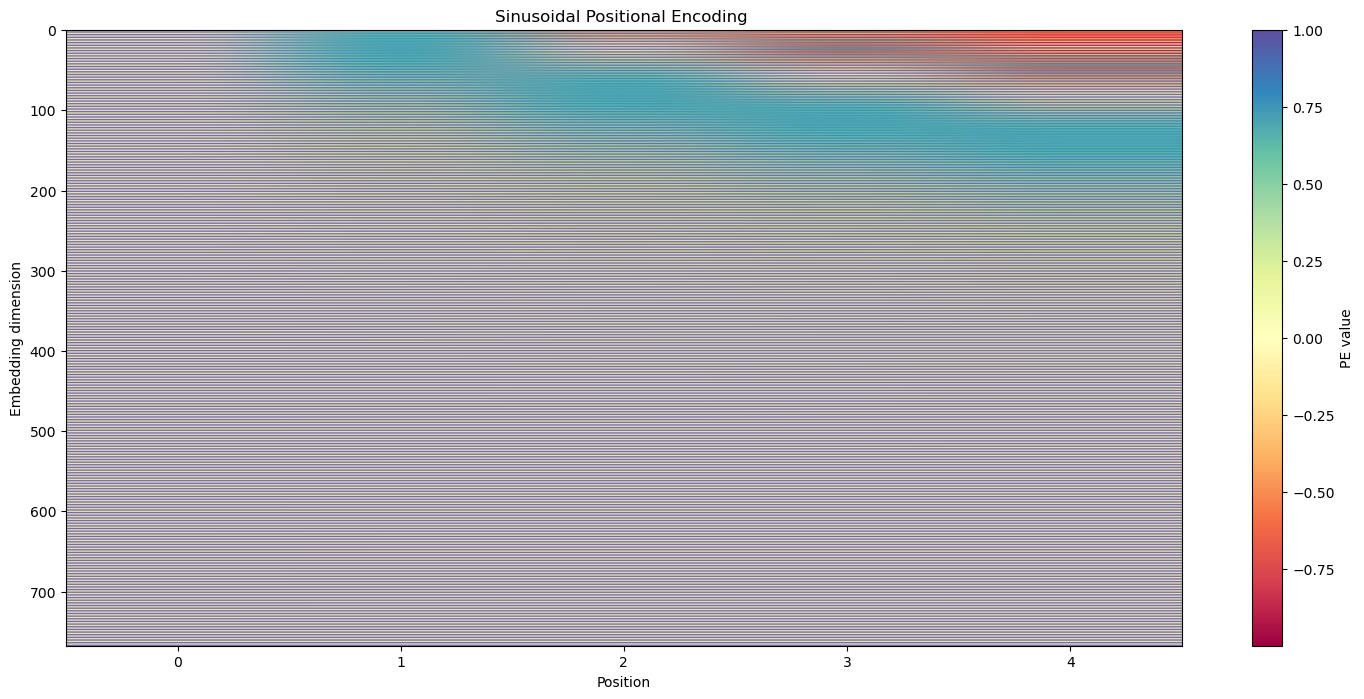

In [42]:
plot_pos(max_len = 5 ,embdim = 768)

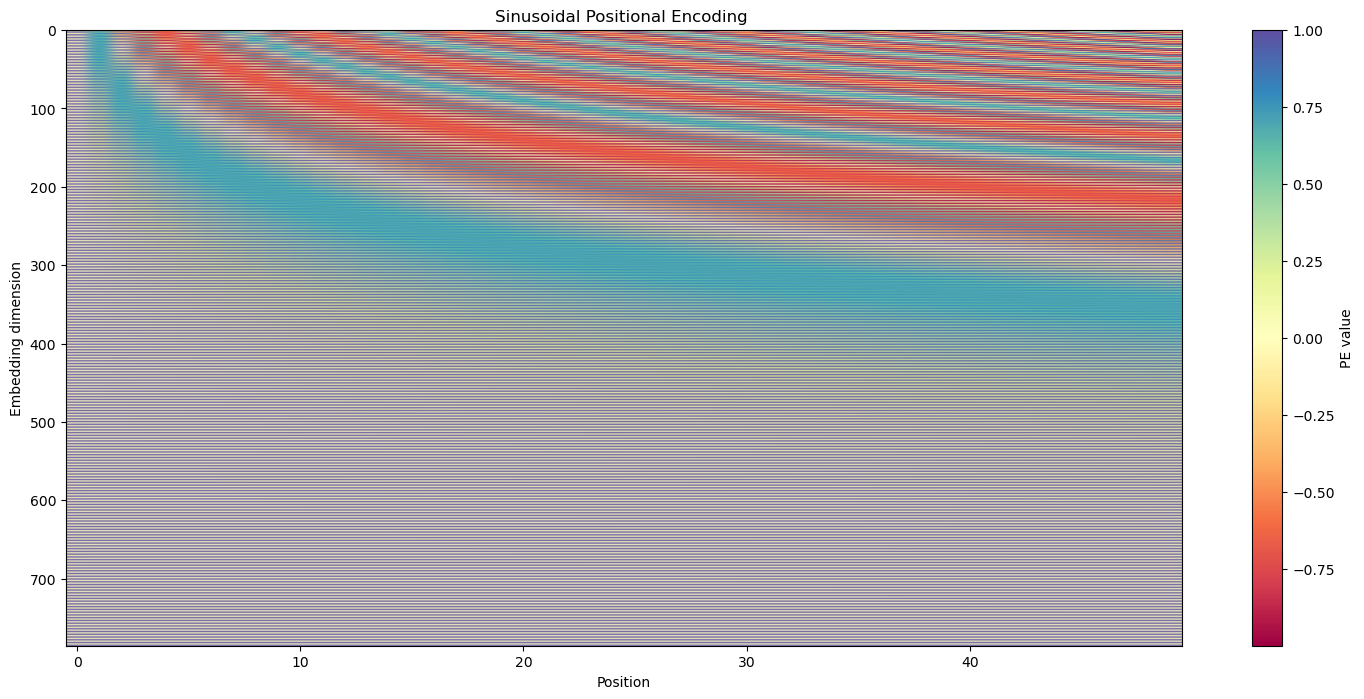

In [43]:
plot_pos(max_len = 50 ,embdim = 786)

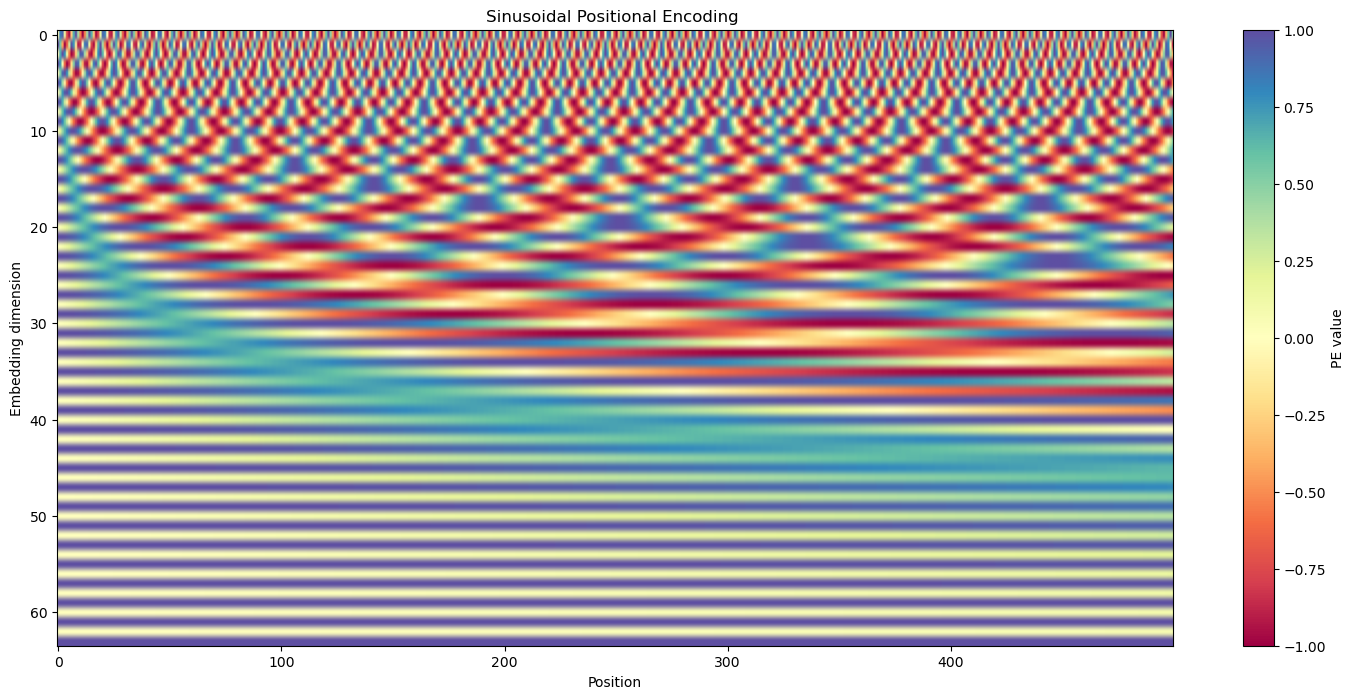

In [44]:
plot_pos(max_len = 500 ,embdim = 64)

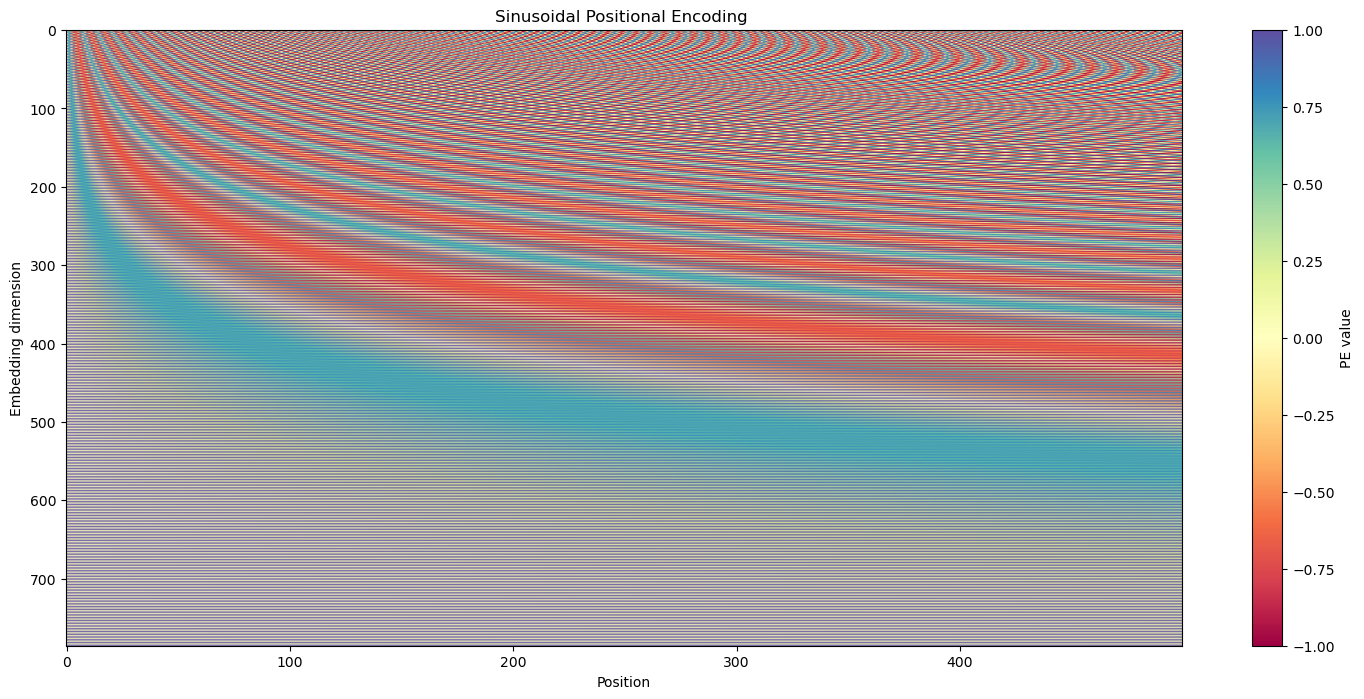

In [45]:
plot_pos()

In [46]:
res=empo(x[:6])
res

tensor([[[-2.2428,  1.2576, -2.7999,  ...,  0.3763,  0.0590,  2.6860],
         [-1.4013,  0.7979, -1.9715,  ...,  0.3763,  0.0592,  2.6860],
         [-1.3335, -0.1585, -1.8719,  ...,  0.3763,  0.0593,  2.6860],
         ...,
         [-2.6224,  1.1828, -1.8055,  ...,  0.3752,  0.1053,  2.6849],
         [-1.6694,  1.0769, -2.1552,  ...,  0.3752,  0.1054,  2.6849],
         [ 0.1810,  0.4489, -0.4390,  ...,  0.3478,  0.9084,  0.3341]],

        [[-2.2428,  1.2576, -2.7999,  ...,  0.3763,  0.0590,  2.6860],
         [-1.4013,  0.7979, -1.9715,  ...,  0.3763,  0.0592,  2.6860],
         [-1.3335, -0.1585, -1.8719,  ...,  0.3763,  0.0593,  2.6860],
         ...,
         [-2.6224,  1.1828, -1.8055,  ...,  0.3752,  0.1053,  2.6849],
         [-0.2448,  1.3081,  0.4779,  ...,  0.3478,  0.9083,  0.3341],
         [ 1.4389, -0.8660,  0.0081,  ...,  1.8022,  0.1215,  0.7644]],

        [[-2.2428,  1.2576, -2.7999,  ...,  0.3763,  0.0590,  2.6860],
         [-1.4013,  0.7979, -1.9715,  ...,  0

### simple Masked Attention

In [47]:
class MaskedSelfAttention(nn.Module):
    def __init__(self, embdim):
        super().__init__()

        self.Wq = nn.Linear(embdim, embdim)
        self.Wk = nn.Linear(embdim, embdim)
        self.Wv = nn.Linear(embdim, embdim)

        self.scale = math.sqrt(embdim)

    def forward(self, x):
        # x: (B, T, D)
        B, T, D = x.size()

        Q = self.Wq(x)
        K = self.Wk(x)
        V = self.Wv(x)

        scores = torch.matmul(Q, K.transpose(-2, -1))
        scores = scores / self.scale     # (B, T, T)

        # causal mask (lower triangular)
        mask = torch.tril(torch.ones(T, T, device=x.device))
        scores = scores.masked_fill(mask == 0, float('-inf'))

        weights = F.softmax(scores, dim=-1)
        output = torch.matmul(weights, V)

        return output


In [48]:
Mselfat=MaskedSelfAttention(768)

In [49]:
ans=Mselfat(res)

In [50]:
ans

tensor([[[-0.7074, -0.8814, -0.0362,  ..., -0.0263, -0.4482,  0.8270],
         [-0.7399, -0.9686, -0.0524,  ..., -0.0066, -0.4032,  0.8074],
         [-0.7803, -1.0064, -0.0694,  ...,  0.0311, -0.3533,  0.7778],
         ...,
         [-1.1379, -0.5928, -0.0774,  ...,  0.3478, -0.9148,  0.8485],
         [-1.1369, -0.5914, -0.0748,  ...,  0.3470, -0.9148,  0.8502],
         [-1.1339, -0.5947, -0.0547,  ...,  0.3416, -0.9164,  0.8504]],

        [[-0.7074, -0.8814, -0.0362,  ..., -0.0263, -0.4482,  0.8270],
         [-0.7399, -0.9686, -0.0524,  ..., -0.0066, -0.4032,  0.8074],
         [-0.7803, -1.0064, -0.0694,  ...,  0.0311, -0.3533,  0.7778],
         ...,
         [-1.1379, -0.5928, -0.0774,  ...,  0.3478, -0.9148,  0.8485],
         [-1.1354, -0.5953, -0.0589,  ...,  0.3421, -0.9167,  0.8486],
         [-1.1228, -0.6001, -0.0567,  ...,  0.3486, -0.9150,  0.8438]],

        [[-0.7074, -0.8814, -0.0362,  ..., -0.0263, -0.4482,  0.8270],
         [-0.7399, -0.9686, -0.0524,  ..., -0

### MultiHead Masked Attention

In [51]:
class MultiHeadAttention(nn.Module):
    def __init__(self, embdim, num_heads):
        super().__init__()
        assert embdim % num_heads == 0

        self.num_heads = num_heads
        self.head_dim = embdim // num_heads

        self.qkv = nn.Linear(embdim, 3 * embdim)
        self.out = nn.Linear(embdim, embdim)

    def forward(self, x):
        B, T, D = x.shape

        qkv = self.qkv(x)                 # (B, T, 3D)
        q, k, v = qkv.chunk(3, dim=-1)

        q = q.view(B, T, self.num_heads, self.head_dim).transpose(1, 2)
        k = k.view(B, T, self.num_heads, self.head_dim).transpose(1, 2)
        v = v.view(B, T, self.num_heads, self.head_dim).transpose(1, 2)

        scores = (q @ k.transpose(-2, -1)) / math.sqrt(self.head_dim)

        mask = torch.tril(torch.ones(T, T, device=x.device))
        scores = scores.masked_fill(mask == 0, float('-inf'))

        attn = F.softmax(scores, dim=-1)
        out = attn @ v                   # (B, H, T, D_head)

        out = out.transpose(1, 2).contiguous().view(B, T, D)
        return self.out(out)


In [52]:
Mselfat=MultiHeadAttention(768,12)

In [53]:
ans=Mselfat(res)

In [54]:
ans

tensor([[[0.2117, 0.2942, 0.1208,  ..., 0.5380, 0.1978, 0.6083],
         [0.1971, 0.3056, 0.1520,  ..., 0.5189, 0.1669, 0.5813],
         [0.1986, 0.3167, 0.1748,  ..., 0.5026, 0.1368, 0.5566],
         ...,
         [0.0782, 0.1652, 0.1843,  ..., 0.4411, 0.1301, 0.5681],
         [0.0775, 0.1657, 0.1837,  ..., 0.4405, 0.1297, 0.5658],
         [0.0859, 0.1732, 0.1800,  ..., 0.4665, 0.1483, 0.5609]],

        [[0.2117, 0.2942, 0.1208,  ..., 0.5380, 0.1978, 0.6083],
         [0.1971, 0.3056, 0.1520,  ..., 0.5189, 0.1669, 0.5813],
         [0.1986, 0.3167, 0.1748,  ..., 0.5026, 0.1368, 0.5566],
         ...,
         [0.0782, 0.1652, 0.1843,  ..., 0.4411, 0.1301, 0.5681],
         [0.0866, 0.1735, 0.1797,  ..., 0.4676, 0.1494, 0.5618],
         [0.0987, 0.1580, 0.1983,  ..., 0.4356, 0.1360, 0.5628]],

        [[0.2117, 0.2942, 0.1208,  ..., 0.5380, 0.1978, 0.6083],
         [0.1971, 0.3056, 0.1520,  ..., 0.5189, 0.1669, 0.5813],
         [0.1986, 0.3167, 0.1748,  ..., 0.5026, 0.1368, 0.

### add residual connections and layer normalization

In [55]:
class AddResidual_LayerNorm(nn.Module):
    def __init__(self, embdim):
        super().__init__()
        self.norm = nn.LayerNorm(embdim)

    def forward(self, x, sublayer):
        return x + sublayer(self.norm(x))

In [56]:
adln=AddResidual_LayerNorm(768)

In [57]:
anss=adln(ans,Mselfat)

In [58]:
anss

tensor([[[ 0.1032,  0.6120,  0.2340,  ...,  0.4692, -0.1725,  0.8205],
         [ 0.0707,  0.6388,  0.2593,  ...,  0.4657, -0.2122,  0.8224],
         [ 0.0574,  0.6614,  0.2774,  ...,  0.4569, -0.2566,  0.8248],
         ...,
         [-0.0994,  0.4503,  0.2751,  ...,  0.5103, -0.4300,  0.7322],
         [-0.1001,  0.4509,  0.2743,  ...,  0.5097, -0.4302,  0.7298],
         [-0.0917,  0.4586,  0.2705,  ...,  0.5357, -0.4116,  0.7247]],

        [[ 0.1032,  0.6120,  0.2340,  ...,  0.4692, -0.1725,  0.8205],
         [ 0.0707,  0.6388,  0.2593,  ...,  0.4657, -0.2122,  0.8224],
         [ 0.0574,  0.6614,  0.2774,  ...,  0.4569, -0.2566,  0.8248],
         ...,
         [-0.0994,  0.4503,  0.2751,  ...,  0.5103, -0.4300,  0.7322],
         [-0.0910,  0.4588,  0.2704,  ...,  0.5368, -0.4106,  0.7257],
         [-0.0788,  0.4433,  0.2889,  ...,  0.5047, -0.4239,  0.7267]],

        [[ 0.1032,  0.6120,  0.2340,  ...,  0.4692, -0.1725,  0.8205],
         [ 0.0707,  0.6388,  0.2593,  ...,  0

## feed-forward network

In [59]:
class FeedForward(nn.Module):
    def __init__(self, embdim, hidden_dim):
        super().__init__()
        self.output_linear = nn.Sequential(nn.Linear(embdim, hidden_dim),
                                                nn.GELU(),
                                                nn.Linear(hidden_dim, embdim))

    def forward(self, x):
        return self.output_linear(x)


In [60]:
fefo=FeedForward(768,3072)

In [61]:
answ=fefo(anss)

In [62]:
answ

tensor([[[-0.0572, -0.0981,  0.0782,  ..., -0.0312,  0.0422,  0.1294],
         [-0.0543, -0.0955,  0.0712,  ..., -0.0302,  0.0426,  0.1234],
         [-0.0507, -0.0953,  0.0640,  ..., -0.0285,  0.0420,  0.1190],
         ...,
         [-0.0493, -0.1185,  0.0898,  ..., -0.0975,  0.0032,  0.1537],
         [-0.0493, -0.1183,  0.0898,  ..., -0.0975,  0.0031,  0.1537],
         [-0.0513, -0.1192,  0.0899,  ..., -0.0997,  0.0034,  0.1527]],

        [[-0.0572, -0.0981,  0.0782,  ..., -0.0312,  0.0422,  0.1294],
         [-0.0543, -0.0955,  0.0712,  ..., -0.0302,  0.0426,  0.1234],
         [-0.0507, -0.0953,  0.0640,  ..., -0.0285,  0.0420,  0.1190],
         ...,
         [-0.0493, -0.1185,  0.0898,  ..., -0.0975,  0.0032,  0.1537],
         [-0.0512, -0.1195,  0.0899,  ..., -0.0996,  0.0037,  0.1525],
         [-0.0507, -0.1205,  0.0887,  ..., -0.0976,  0.0026,  0.1533]],

        [[-0.0572, -0.0981,  0.0782,  ..., -0.0312,  0.0422,  0.1294],
         [-0.0543, -0.0955,  0.0712,  ..., -0

In [63]:
ansfefo=adln(answ,fefo)

In [64]:
ansfefo

tensor([[[-0.0740, -0.0525, -0.0506,  ..., -0.0681, -0.0553,  0.4663],
         [-0.0710, -0.0333, -0.0495,  ..., -0.0618, -0.0705,  0.4737],
         [-0.0661, -0.0095, -0.0481,  ..., -0.0547, -0.0771,  0.4820],
         ...,
         [-0.1079,  0.0760, -0.0941,  ..., -0.1217, -0.0829,  0.4164],
         [-0.1073,  0.0754, -0.0946,  ..., -0.1204, -0.0828,  0.4172],
         [-0.1112,  0.0785, -0.0990,  ..., -0.1229, -0.0808,  0.4095]],

        [[-0.0740, -0.0525, -0.0506,  ..., -0.0681, -0.0553,  0.4663],
         [-0.0710, -0.0333, -0.0495,  ..., -0.0618, -0.0705,  0.4737],
         [-0.0661, -0.0095, -0.0481,  ..., -0.0547, -0.0771,  0.4820],
         ...,
         [-0.1079,  0.0760, -0.0941,  ..., -0.1217, -0.0829,  0.4164],
         [-0.1114,  0.0791, -0.0987,  ..., -0.1238, -0.0805,  0.4089],
         [-0.1093,  0.0764, -0.0955,  ..., -0.1268, -0.0826,  0.4109]],

        [[-0.0740, -0.0525, -0.0506,  ..., -0.0681, -0.0553,  0.4663],
         [-0.0710, -0.0333, -0.0495,  ..., -0

# Decoder Block

In [65]:
class DecoderBlock(nn.Module):
    def __init__(self, embdim, num_heads, ff_hidden_dim):
        super().__init__()
        
        self.mha = MultiHeadAttention(embdim, num_heads)
        self.ff = FeedForward(embdim, ff_hidden_dim)
        self.attn_norm = AddResidual_LayerNorm(embdim)
        self.ff_norm = AddResidual_LayerNorm(embdim)

    def forward(self, x):
        
        # multi-head attention with residual + norm
        x = self.attn_norm(x, self.mha)
        # feed-forward network with residual + norm
        x = self.ff_norm(x, self.ff)
        
        return x


In [66]:
embdim=768
num_heads=12
ff_hidden_dim=3072
vocab_size=38987

In [67]:
embedpossi=embpos(vocab_size,embdim)

In [68]:
answerr=embedpossi(x[:6])

In [69]:
answerr

tensor([[[-1.1658,  2.3574,  1.1099,  ..., -0.1200, -1.8443,  1.7331],
         [-0.3244,  1.8977,  1.9383,  ..., -0.1200, -1.8442,  1.7331],
         [-0.2565,  0.9412,  2.0379,  ..., -0.1200, -1.8441,  1.7331],
         ...,
         [-1.5454,  2.2825,  2.1043,  ..., -0.1211, -1.7980,  1.7321],
         [-0.5924,  2.1766,  1.7546,  ..., -0.1211, -1.7979,  1.7321],
         [ 1.2533,  1.2492,  1.1084,  ...,  0.5771,  0.9483,  1.2285]],

        [[-1.1658,  2.3574,  1.1099,  ..., -0.1200, -1.8443,  1.7331],
         [-0.3244,  1.8977,  1.9383,  ..., -0.1200, -1.8442,  1.7331],
         [-0.2565,  0.9412,  2.0379,  ..., -0.1200, -1.8441,  1.7331],
         ...,
         [-1.5454,  2.2825,  2.1043,  ..., -0.1211, -1.7980,  1.7321],
         [ 0.8275,  2.1083,  2.0253,  ...,  0.5771,  0.9482,  1.2285],
         [ 0.1953,  0.8015, -1.8404,  ...,  1.5384,  1.2925,  1.3249]],

        [[-1.1658,  2.3574,  1.1099,  ..., -0.1200, -1.8443,  1.7331],
         [-0.3244,  1.8977,  1.9383,  ..., -0

In [70]:
Decoder=DecoderBlock(embdim, num_heads, ff_hidden_dim)

In [71]:
resu=Decoder(answerr)

In [72]:
resu

tensor([[[-0.9269,  2.9065,  1.0094,  ...,  0.1636, -1.2079,  1.5646],
         [-0.1317,  2.4475,  1.8207,  ...,  0.2011, -1.1867,  1.5608],
         [-0.1358,  1.5136,  1.8934,  ...,  0.2414, -1.2044,  1.5594],
         ...,
         [-1.4430,  2.9913,  2.0375,  ...,  0.1391, -1.3115,  1.2677],
         [-0.4704,  2.9124,  1.6560,  ...,  0.1039, -1.3218,  1.2404],
         [ 1.3767,  1.8569,  1.1832,  ...,  0.9163,  1.5695,  1.1800]],

        [[-0.9269,  2.9065,  1.0094,  ...,  0.1636, -1.2079,  1.5646],
         [-0.1317,  2.4475,  1.8207,  ...,  0.2011, -1.1867,  1.5608],
         [-0.1358,  1.5136,  1.8934,  ...,  0.2414, -1.2044,  1.5594],
         ...,
         [-1.4430,  2.9913,  2.0375,  ...,  0.1391, -1.3115,  1.2677],
         [ 0.9030,  2.6928,  2.0919,  ...,  0.9310,  1.5847,  1.1929],
         [ 0.4976,  1.4268, -1.7796,  ...,  1.5110,  2.0121,  1.0797]],

        [[-0.9269,  2.9065,  1.0094,  ...,  0.1636, -1.2079,  1.5646],
         [-0.1317,  2.4475,  1.8207,  ...,  0

# GPT-2

In [73]:
class GPT2(nn.Module):
    def __init__(self, vocab_size, embdim=768, num_heads=12, ff_hidden_dim=2048, num_layers=12):
        super().__init__()
        # embedding + positional encoding
        self.emb = embpos(vocab_size, embdim)

        # stacked encoder blocks
        self.layers = nn.ModuleList([
            DecoderBlock(embdim, num_heads, ff_hidden_dim) for _ in range(num_layers)
        ])

    def forward(self, x):

        x = self.emb(x)  # (B, T, D)

        for layer in self.layers:
            x = layer(x)

        return x  # (B, T, D)


In [74]:
vocab_size=38987

In [75]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
#device='cpu'

In [76]:
model=GPT2(vocab_size=vocab_size).to(device)

In [77]:
model

GPT2(
  (emb): embpos(
    (embedding): Embedding(38987, 768)
  )
  (layers): ModuleList(
    (0-11): 12 x DecoderBlock(
      (mha): MultiHeadAttention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (out): Linear(in_features=768, out_features=768, bias=True)
      )
      (ff): FeedForward(
        (output_linear): Sequential(
          (0): Linear(in_features=768, out_features=2048, bias=True)
          (1): GELU(approximate='none')
          (2): Linear(in_features=2048, out_features=768, bias=True)
        )
      )
      (attn_norm): AddResidual_LayerNorm(
        (norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      )
      (ff_norm): AddResidual_LayerNorm(
        (norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      )
    )
  )
)

In [78]:
predd=model(torch.tensor(x[:6]).to(device))
predd

tensor([[[-1.8652,  0.7738, -0.0680,  ...,  1.8633,  0.3137,  1.3448],
         [-0.9662,  0.1082,  0.8812,  ...,  1.8714,  0.1894,  1.4001],
         [-0.8008, -1.0974,  1.0021,  ...,  1.8143,  0.1101,  1.4438],
         ...,
         [-0.6060, -0.2506,  0.8082,  ..., -0.0961,  1.4719,  1.6628],
         [ 0.2243, -0.3384,  0.5503,  ..., -0.1193,  1.6088,  1.7769],
         [-1.2914, -0.1919, -1.8325,  ..., -0.2826,  3.0365,  3.3126]],

        [[-1.8652,  0.7738, -0.0680,  ...,  1.8633,  0.3137,  1.3448],
         [-0.9662,  0.1082,  0.8812,  ...,  1.8714,  0.1894,  1.4001],
         [-0.8008, -1.0974,  1.0021,  ...,  1.8143,  0.1101,  1.4438],
         ...,
         [-0.6060, -0.2506,  0.8082,  ..., -0.0961,  1.4719,  1.6628],
         [-1.6039,  0.6431, -0.9696,  ..., -0.2445,  3.0819,  3.1692],
         [ 0.6414, -1.6359,  1.6556,  ...,  1.6556,  2.0067,  1.2007]],

        [[-1.8652,  0.7738, -0.0680,  ...,  1.8633,  0.3137,  1.3448],
         [-0.9662,  0.1082,  0.8812,  ...,  1

In [79]:
predd.shape

torch.Size([6, 455, 768])

# out layer

In [80]:
class AttentionPooling(nn.Module):
    def __init__(self, embdim):
        super().__init__()
        self.score = nn.Linear(embdim, 1)

    def forward(self, x):
        # x: (B, T, D)
        weights = self.score(x)             # (B, T, 1)
        weights = torch.softmax(weights, dim=1)
        pooled = (weights * x).sum(dim=1)   # (B, D)
        return pooled


In [81]:
class GPT2OutputHead(nn.Module):
    def __init__(self, embdim, vocab_size):
        super().__init__()
        self.pool = AttentionPooling(embdim)
        self.fc = nn.Linear(embdim, vocab_size)

    def forward(self, hidden):      # hidden: (B, T, 768)
        pooled = self.pool(hidden)  # (B, 768)
        logits = self.fc(pooled)    # (B, vocab_size)
        return logits


In [82]:
out_layer=GPT2OutputHead(768,vocab_size).to(device)

In [83]:
finalans=out_layer(predd)

In [84]:
finalans.shape

torch.Size([6, 38987])

In [85]:
finalans

tensor([[ 0.3470, -0.4651, -0.8641,  ...,  0.4072,  1.2490, -0.7740],
        [ 0.3470, -0.4635, -0.8655,  ...,  0.4080,  1.2450, -0.7715],
        [ 0.3529, -0.4676, -0.8678,  ...,  0.4083,  1.2413, -0.7714],
        [ 0.3496, -0.4618, -0.8693,  ...,  0.4074,  1.2379, -0.7640],
        [ 0.3485, -0.4610, -0.8667,  ...,  0.4097,  1.2387, -0.7629],
        [ 0.3577, -0.4467, -0.8538,  ...,  0.4053,  1.2148, -0.7572]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

## record of GPT-2 parameters

In [86]:
for name, param in model.named_parameters():
    print(name, param.requires_grad)

emb.embedding.weight True
layers.0.mha.qkv.weight True
layers.0.mha.qkv.bias True
layers.0.mha.out.weight True
layers.0.mha.out.bias True
layers.0.ff.output_linear.0.weight True
layers.0.ff.output_linear.0.bias True
layers.0.ff.output_linear.2.weight True
layers.0.ff.output_linear.2.bias True
layers.0.attn_norm.norm.weight True
layers.0.attn_norm.norm.bias True
layers.0.ff_norm.norm.weight True
layers.0.ff_norm.norm.bias True
layers.1.mha.qkv.weight True
layers.1.mha.qkv.bias True
layers.1.mha.out.weight True
layers.1.mha.out.bias True
layers.1.ff.output_linear.0.weight True
layers.1.ff.output_linear.0.bias True
layers.1.ff.output_linear.2.weight True
layers.1.ff.output_linear.2.bias True
layers.1.attn_norm.norm.weight True
layers.1.attn_norm.norm.bias True
layers.1.ff_norm.norm.weight True
layers.1.ff_norm.norm.bias True
layers.2.mha.qkv.weight True
layers.2.mha.qkv.bias True
layers.2.mha.out.weight True
layers.2.mha.out.bias True
layers.2.ff.output_linear.0.weight True
layers.2.ff.ou

In [87]:
total_params = sum(p.numel() for p in model.parameters())
print(total_params)

96109824


In [88]:
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(trainable_params)

96109824


In [89]:
num_param_tensors = len(list(model.named_parameters()))
print(num_param_tensors)

145


In [90]:
all_trainable = all(p.requires_grad for p in model.parameters())
print("All parameters trainable:", all_trainable)

All parameters trainable: True


##  MY GPT2

In [91]:
class MY_GPT(nn.Module):
    def __init__(self, embdim,vocab_size):
        super().__init__()
        self.out_layer=GPT2OutputHead(768,vocab_size)
        self.model=GPT2(vocab_size=vocab_size)

    def forward(self, x):
        x=self.model(x)
        x=self.out_layer(x)
        return x


In [92]:
my_model=MY_GPT(768,vocab_size).to(device)

In [93]:
my_model

MY_GPT(
  (out_layer): GPT2OutputHead(
    (pool): AttentionPooling(
      (score): Linear(in_features=768, out_features=1, bias=True)
    )
    (fc): Linear(in_features=768, out_features=38987, bias=True)
  )
  (model): GPT2(
    (emb): embpos(
      (embedding): Embedding(38987, 768)
    )
    (layers): ModuleList(
      (0-11): 12 x DecoderBlock(
        (mha): MultiHeadAttention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (out): Linear(in_features=768, out_features=768, bias=True)
        )
        (ff): FeedForward(
          (output_linear): Sequential(
            (0): Linear(in_features=768, out_features=2048, bias=True)
            (1): GELU(approximate='none')
            (2): Linear(in_features=2048, out_features=768, bias=True)
          )
        )
        (attn_norm): AddResidual_LayerNorm(
          (norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        (ff_norm): AddResidual_LayerNorm(
          (norm): Laye

## record of MY-MODEL GPT-2 parameters

In [94]:
for name, param in my_model.named_parameters():
    print(name, param.requires_grad)

out_layer.pool.score.weight True
out_layer.pool.score.bias True
out_layer.fc.weight True
out_layer.fc.bias True
model.emb.embedding.weight True
model.layers.0.mha.qkv.weight True
model.layers.0.mha.qkv.bias True
model.layers.0.mha.out.weight True
model.layers.0.mha.out.bias True
model.layers.0.ff.output_linear.0.weight True
model.layers.0.ff.output_linear.0.bias True
model.layers.0.ff.output_linear.2.weight True
model.layers.0.ff.output_linear.2.bias True
model.layers.0.attn_norm.norm.weight True
model.layers.0.attn_norm.norm.bias True
model.layers.0.ff_norm.norm.weight True
model.layers.0.ff_norm.norm.bias True
model.layers.1.mha.qkv.weight True
model.layers.1.mha.qkv.bias True
model.layers.1.mha.out.weight True
model.layers.1.mha.out.bias True
model.layers.1.ff.output_linear.0.weight True
model.layers.1.ff.output_linear.0.bias True
model.layers.1.ff.output_linear.2.weight True
model.layers.1.ff.output_linear.2.bias True
model.layers.1.attn_norm.norm.weight True
model.layers.1.attn_no

In [95]:
trainable_params = sum(p.numel() for p in my_model.parameters() if p.requires_grad)
print(trainable_params)

126091596


In [96]:
num_param_tensors = len(list(my_model.named_parameters()))
print(num_param_tensors)

149


In [97]:
all_trainable = all(p.requires_grad for p in my_model.parameters())
print("All parameters trainable:", all_trainable)

All parameters trainable: True


## training

In [98]:
def accuracy_fn(logits, y):
    preds = torch.argmax(logits, dim=-1)  # (B,)
    y = y.view(-1)                        # (B,)
    correct = (preds == y).float()
    return correct.mean().item()

In [99]:
def train(model,EPOCH, batch_size):
    my_model.train()
    
    for epoch in range(EPOCH):
        total_loss = 0.0
        total_acc = 0.0

        for step, (x, y) in enumerate(dataloader):
            x = x.to(device)   # (B, T)
            y = y.to(device)   # (B, T)
            y = y.long()

            optimizer.zero_grad()

            # forward
            logits = my_model(x)             

            # loss
            loss = loss_fn(logits, y)      

            # backward
            loss.backward()
            optimizer.step()

            # accuracy
            preds = logits.argmax(dim=-1)  # (B)
            acc = accuracy_fn(logits, y)

            total_loss += loss.item()
            total_acc += acc

            # batch progress
            if (step + 1) % batch_size == 0:
                print(f"Epoch: {epoch+1}/{EPOCH} | Step: {step+1}/{len(dataloader)} | Loss: {loss.item():.4f} | Acc: {acc:.4f}")

        avg_loss = total_loss / len(dataloader)
        avg_acc = total_acc / len(dataloader)

        print(f"\nEpoch: {epoch+1} | Avg Loss: {avg_loss:.4f} | Avg Acc: {avg_acc:.4f}\n")

    return avg_loss, avg_acc


In [100]:
optimizer = torch.optim.Adam(my_model.parameters(), lr=6e-4)
loss_fn = nn.CrossEntropyLoss()

In [101]:
%%time
train(my_model,EPOCH=1, batch_size=4)

Epoch: 1/1 | Step: 4/259130 | Loss: 41.5310 | Acc: 0.0000
Epoch: 1/1 | Step: 8/259130 | Loss: 9.9886 | Acc: 0.0000
Epoch: 1/1 | Step: 12/259130 | Loss: 16.0300 | Acc: 0.0000
Epoch: 1/1 | Step: 16/259130 | Loss: 18.4975 | Acc: 0.0000
Epoch: 1/1 | Step: 20/259130 | Loss: 12.6972 | Acc: 0.0000
Epoch: 1/1 | Step: 24/259130 | Loss: 17.6402 | Acc: 0.0000
Epoch: 1/1 | Step: 28/259130 | Loss: 16.7050 | Acc: 0.0000
Epoch: 1/1 | Step: 32/259130 | Loss: 20.4177 | Acc: 0.0000
Epoch: 1/1 | Step: 36/259130 | Loss: 14.5927 | Acc: 0.0000
Epoch: 1/1 | Step: 40/259130 | Loss: 16.7949 | Acc: 0.0000
Epoch: 1/1 | Step: 44/259130 | Loss: 19.1036 | Acc: 0.0000
Epoch: 1/1 | Step: 48/259130 | Loss: 10.8507 | Acc: 0.0000
Epoch: 1/1 | Step: 52/259130 | Loss: 12.7809 | Acc: 0.0000
Epoch: 1/1 | Step: 56/259130 | Loss: 15.1148 | Acc: 0.0000
Epoch: 1/1 | Step: 60/259130 | Loss: 11.8238 | Acc: 0.0000
Epoch: 1/1 | Step: 64/259130 | Loss: 16.2286 | Acc: 0.0000
Epoch: 1/1 | Step: 68/259130 | Loss: 12.6338 | Acc: 0.0000



KeyboardInterrupt



In [102]:
from pathlib import Path
root=Path('models')
root.mkdir(exist_ok=True)
path1= root / "GPT.pth"
path2= root / "GPT_outlayer.pth"
path3= root / "MY_GPT.pth"

In [103]:
torch.save(model,path1)

In [104]:
torch.save(out_layer,path2)

In [105]:
torch.save(my_model,path3)